# Features Extraction and Training Model

In [1]:
import glob
import numpy as np
from lesson_functions import *
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# set the seed
np.random.seed(450)

def feature_extraction(imgs, file_type="png", color_space='RGB', 
                       spatial_size=(32, 32), hist_bins=32, orient=9,
                       pix_per_cell=8, cell_per_block=2, hog_channel=0,
                       spatial_feat=True, hist_feat=True, hog_feat=True):

    features = extract_features(imgs, file_type=file_type, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, orient=orient,
                                pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
    
    print("Settings")
    print("=======================")
    print("File type : {}".format(file_type))
    print("Color space : {}".format(color_space))
    print("Spatial size : {}".format(spatial_size))
    print("Histogram bins : {}".format(hist_bins))
    print("Orientation : {}".format(orient))
    print("Pixel per cell : {}".format(pix_per_cell))
    print("Cell per block : {}".format(cell_per_block))
    print("HOG channel : {}".format(hog_channel))
    print("Spatial feature : {}".format(spatial_feat))
    print("Histogram feature : {}".format(hist_feat))
    print("HOG feature : {}".format(hog_feat))
    print("=======================")
    print("Total features: {}".format(len(features)))
    return features

def scale_features(features):
    features = np.array(features).astype(np.float64)
    scaler = StandardScaler()
    scaler.fit(features)
    features = scaler.transform(features)
    return features, scaler

def test_features_performance(images, labels, color_space='RGB', 
                              spatial_size=(32, 32), hist_bins=32, orient=9,
                              pix_per_cell=8, cell_per_block=2, hog_channel=0,
                              spatial_feat=True, hist_feat=True, hog_feat=True):    
    features = feature_extraction(images, color_space=color_space,
                                  spatial_size=spatial_size, hist_bins=hist_bins, orient=orient,
                                  pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                  hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                  hist_feat=hist_feat, hog_feat=hog_feat)
    features, scaler = scale_features(features)
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=0.2,
        stratify = labels,
        random_state=256)
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Score: {0:.4f}".format(score))

### Load Data

In [2]:
vehicle_images = glob.glob("./data/vehicles/**/*.png")
non_vehicle_images = glob.glob("./data/non-vehicles/**/*.png")

images = np.hstack((vehicle_images, non_vehicle_images))
labels = np.hstack((np.ones(len(vehicle_images)), np.zeros(len(non_vehicle_images))))
print("Number of vechile images : {}".format(len(vehicle_images)))
print("Number of non-vechile images : {}".format(len(non_vehicle_images)))
print("Total images : {}".format(len(images)))

Number of vechile images : 8792
Number of non-vechile images : 8968
Total images : 17760


### Visualize Data

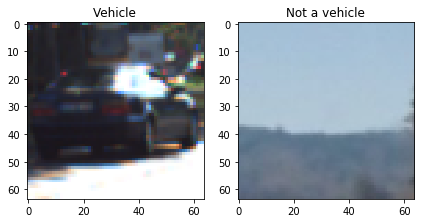

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

vehicle_sample = mpimg.imread(vehicle_images[np.random.randint(0, len(vehicle_images) - 1)])
non_vehicle_sample = mpimg.imread(non_vehicle_images[np.random.randint(0, len(non_vehicle_images) - 1)])
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(vehicle_sample)
plt.title("Vehicle")
plt.subplot(1,2,2)
plt.imshow(non_vehicle_sample)
plt.title("Not a vehicle")
plt.tight_layout()
fig.savefig("./output/car_not_car.png")
plt.show()

### HOG Visualization

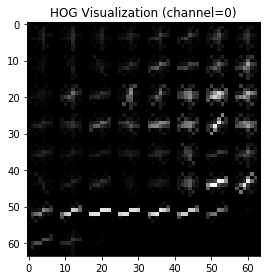

In [4]:
features, hog_img = get_hog_features(vehicle_sample[:,:,0], 9, 8, 2, 
                        vis=True, feature_vec=True)
fig = plt.figure()
plt.imshow(hog_img, cmap="gray")
plt.title("HOG Visualization (channel=0)")
plt.tight_layout()
fig.savefig("./output/HOG_example.png")
plt.show()

### Test model performance with different feature extraction options

In [5]:
test_features_performance(images, labels)

Settings
File type : png
Color space : RGB
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9817


In [6]:
test_features_performance(images, labels, color_space='YUV')

Settings
File type : png
Color space : YUV
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9834


In [7]:
test_features_performance(images, labels, color_space='HSV')

Settings
File type : png
Color space : HSV
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9775


In [8]:
test_features_performance(images, labels, color_space='HLS')

Settings
File type : png
Color space : HLS
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9730


In [9]:
test_features_performance(images, labels, color_space='LUV')

Settings
File type : png
Color space : LUV
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9862


In [10]:
test_features_performance(images, labels, color_space='YCrCb')

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9862


In [11]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(24, 24))

Settings
File type : png
Color space : YCrCb
Spatial size : (24, 24)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9859


In [12]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(48, 48))

Settings
File type : png
Color space : YCrCb
Spatial size : (48, 48)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 0
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9851


In [13]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel=1)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 1
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9752


In [14]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel=2)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : 2
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9716


In [15]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel="ALL")

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : ALL
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9927


In [16]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel="ALL", pix_per_cell=6)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 6
Cell per block : 2
HOG channel : ALL
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9955


In [17]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel="ALL", pix_per_cell=12)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 12
Cell per block : 2
HOG channel : ALL
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9930


In [18]:
test_features_performance(images, labels, color_space='YCrCb', spatial_size=(32, 32), hog_channel="ALL", pix_per_cell=6, cell_per_block=4)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 6
Cell per block : 4
HOG channel : ALL
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760
Score: 0.9935


### Selected Settings

In [19]:
# Settings
color_space = 'YCrCb'
spatial_size = (32,32)
hist_bins = 32
orient = 9
pixel_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

features = feature_extraction(images, color_space=color_space, pix_per_cell=pixel_per_cell, hog_channel=hog_channel)
features, scaler = scale_features(features)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    stratify = labels,
    random_state=256)

Settings
File type : png
Color space : YCrCb
Spatial size : (32, 32)
Histogram bins : 32
Orientation : 9
Pixel per cell : 8
Cell per block : 2
HOG channel : ALL
Spatial feature : True
Histogram feature : True
HOG feature : True
Total features: 17760


### Compare LinearSVC with DecisionTree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score: {0:.4f}".format(score))

Score: 0.9730


### Save Model with LinearSVC 

In [21]:
clf = LinearSVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score: {0:.4f}".format(score))

Score: 0.9927


In [22]:
# save model
from sklearn.externals import joblib
model = { 
    "classifier": clf,
    "scaler": scaler,
    "color_space" : color_space,
    "spatial_size" : spatial_size,
    "hist_bins" : hist_bins,
    "orient" : orient,
    "pix_per_cell" : pixel_per_cell, 
    "cell_per_block" : cell_per_block,
    "hog_channel" : hog_channel,
    "spatial_feat" : spatial_feat,
    "hist_feat" : hist_feat,
    "hog_feat" : hog_feat
}
joblib.dump(model, "model.pkl")
print("model saved.")

model saved.
